In [144]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats


In [145]:
red_base_df = pd.read_csv("wine_data\winequality-red.csv", sep=";")
white_base_df = pd.read_csv("wine_data\winequality-white.csv", sep =";")

red_base_df.insert(0, "wine_type", "red")
white_base_df.insert(0,"wine_type","white")

#unified dataframe 
allwine_base_df = pd.concat([red_base_df,white_base_df], axis = 0, ignore_index=True)

#Add quality labels
allwine_base_df["quality_label"] = allwine_base_df['quality'].apply(lambda value: "low"
                                                                if value <= 4 else "medium"
                                                                if value <= 7 else "high") # great example of .apply(lamda)

allwine_base_df["quality_label"] = pd.Categorical(allwine_base_df["quality_label"], categories = ["low","medium","high"])




<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Leon\AppData\Local\Temp\ipykernel_15504\4107949885.py:1: SyntaxWarning: invalid escape sequence '\w'
  red_base_df = pd.read_csv("wine_data\winequality-red.csv", sep=";")
C:\Users\Leon\AppData\Local\Temp\ipykernel_15504\4107949885.py:2: SyntaxWarning: invalid escape sequence '\w'
  white_base_df = pd.read_csv("wine_data\winequality-white.csv", sep =";")


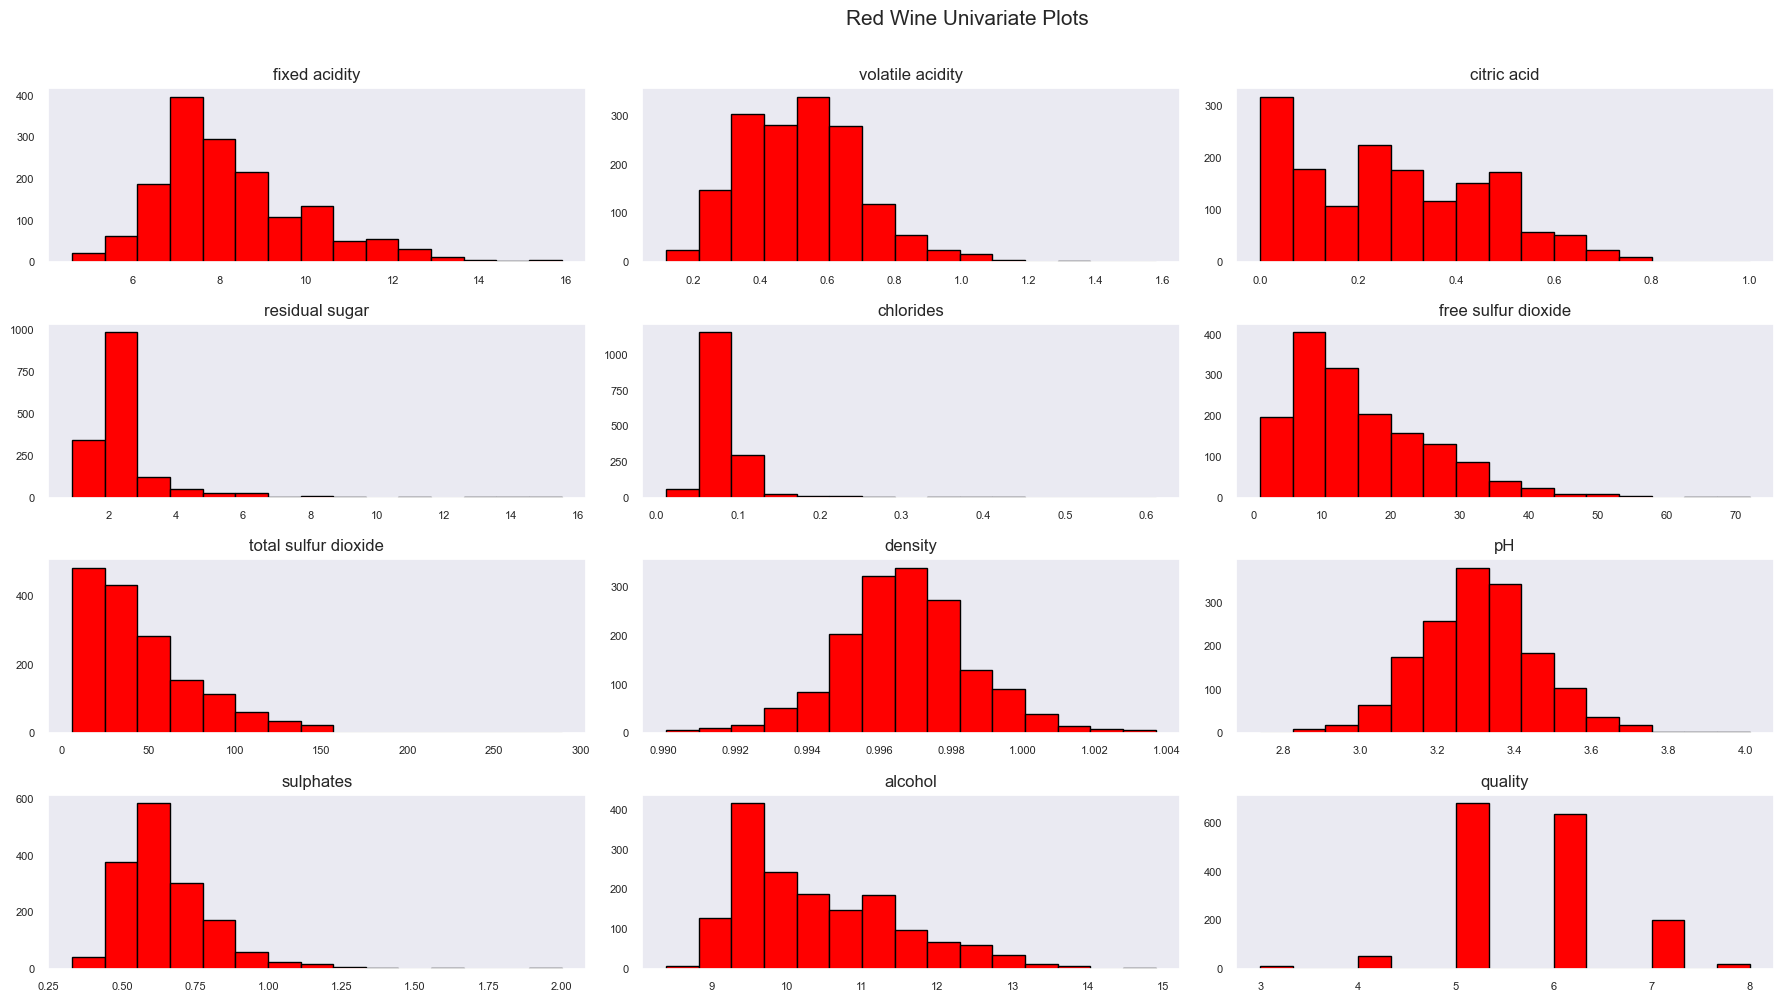

In [146]:
#Plotting univariant analysis for red wine data:
red_base_df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

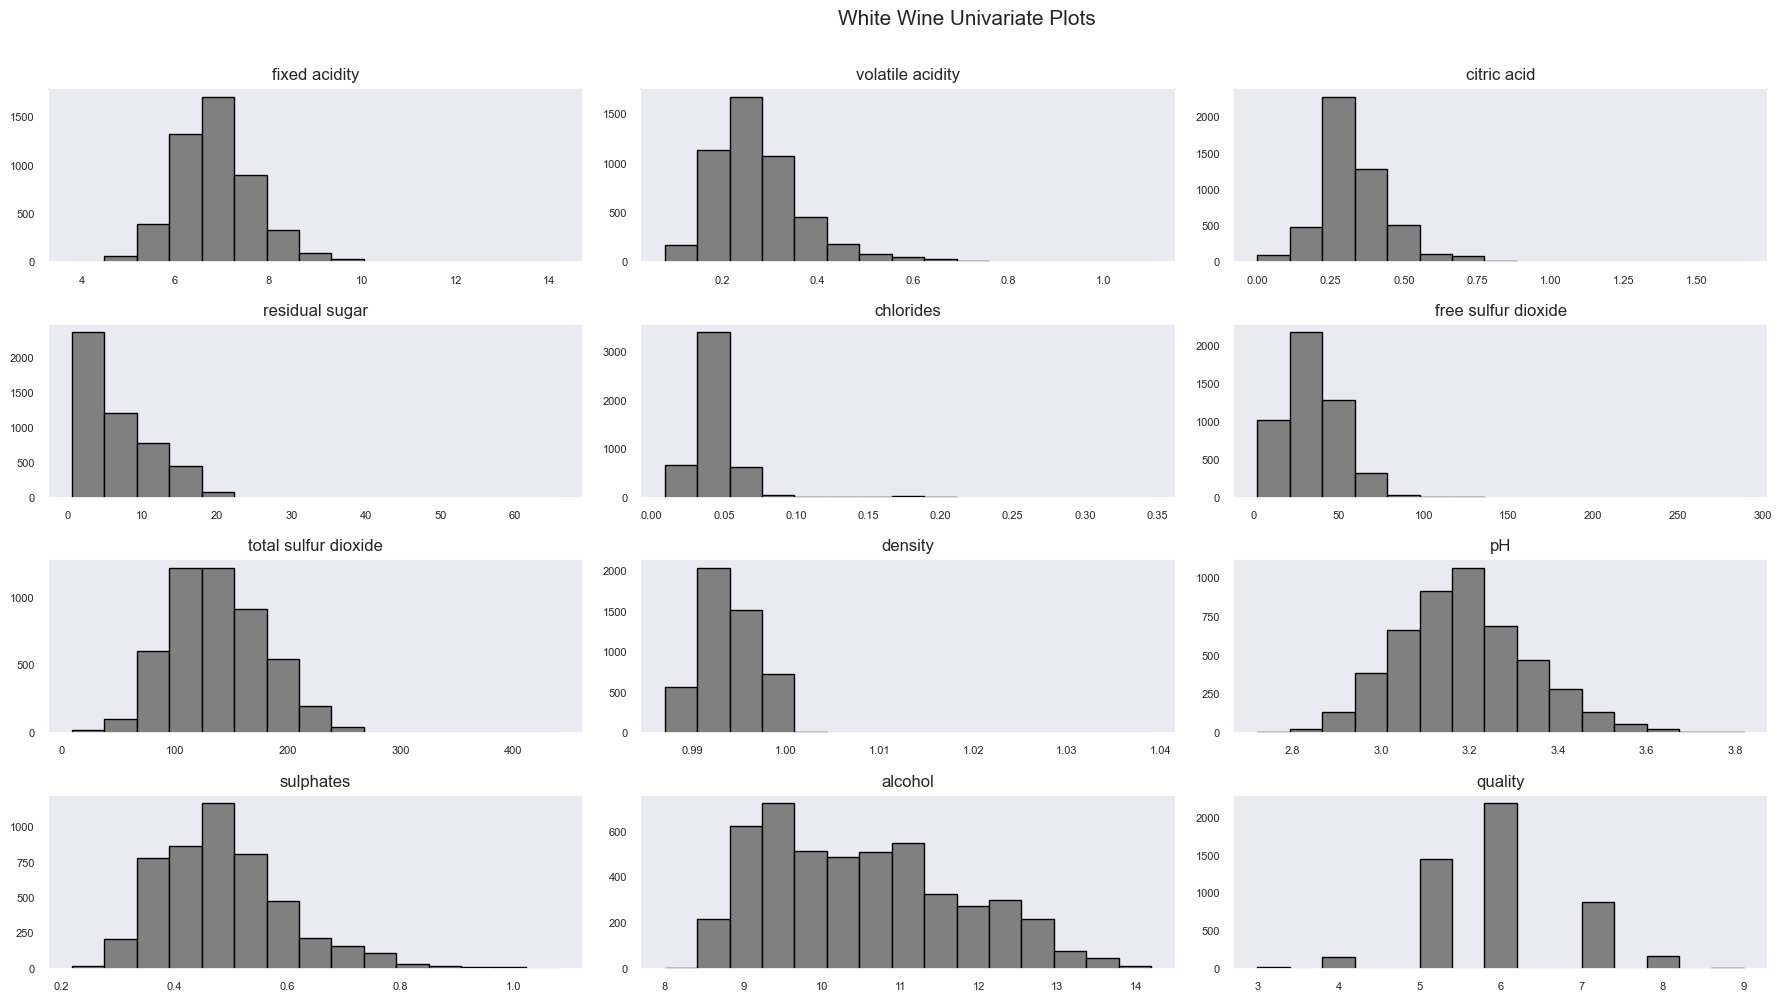

In [147]:
white_base_df.hist(bins=15, color='grey', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

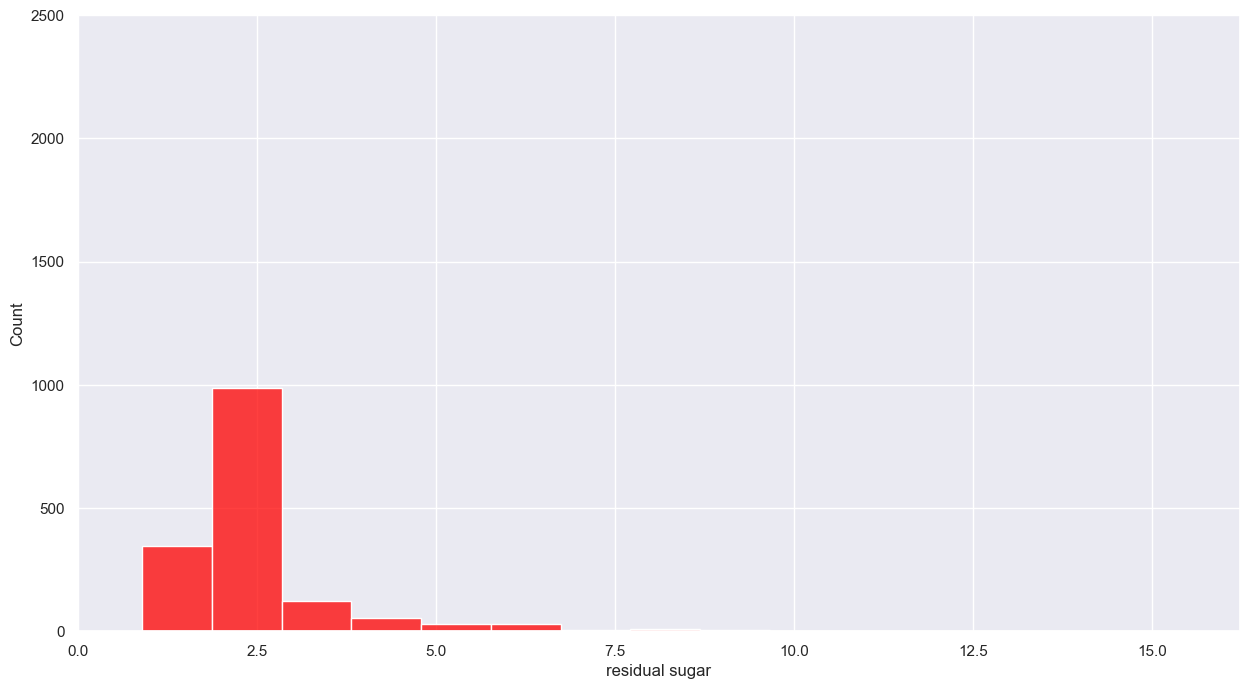

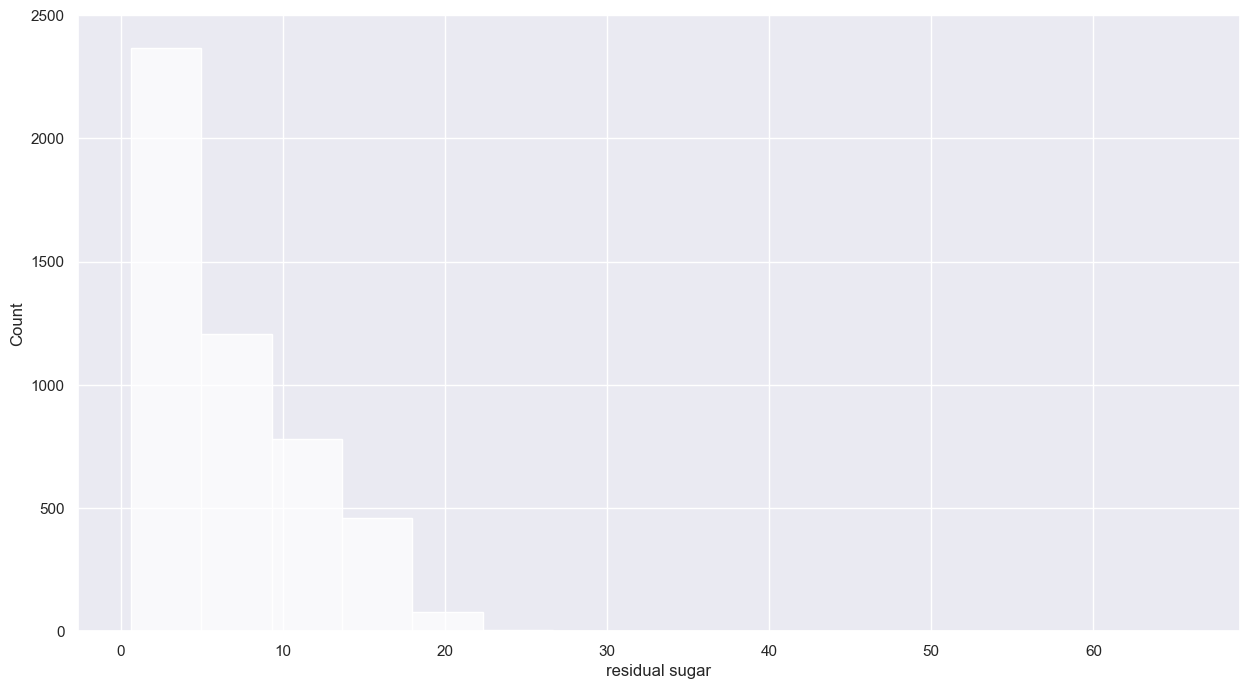

In [148]:
#Plot two histograms for the residual sugar frequency in red and white
#red_base_df.head(10)

#plotting histplots

filtered_red = allwine_base_df[allwine_base_df['wine_type'] =='red']
filtered_white = allwine_base_df[allwine_base_df['wine_type'] =='white']


res_sug_red = sns.histplot(data=filtered_red, x = "residual sugar", bins = 15, color = "red")
res_sug_red.set_xticks([0,2.5,5,7.5,10,12.5,15])
res_sug_red.set_ylim(0,2500)
plt.show()


res_sug_white = sns.histplot(data=filtered_white, x = "residual sugar", bins = 15, color = "white")
res_sug_white.set_xticks([0,10,20,30,40,50,60])
res_sug_white.set_ylim(0,2500)
plt.show()

#  Facetgrid approach wont work because of varying xticks 

#grid = sns.FacetGrid(data=allwine_base_df, col="wine_type")
#grid.map(allwine_base_df, sns.histplot(data=allwine_base_df, x = "residual sugar", bins = 15, color = "red"))


In [149]:

allwine_base_df.head(10)



,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,medium
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,medium
8,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,medium
9,red,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium


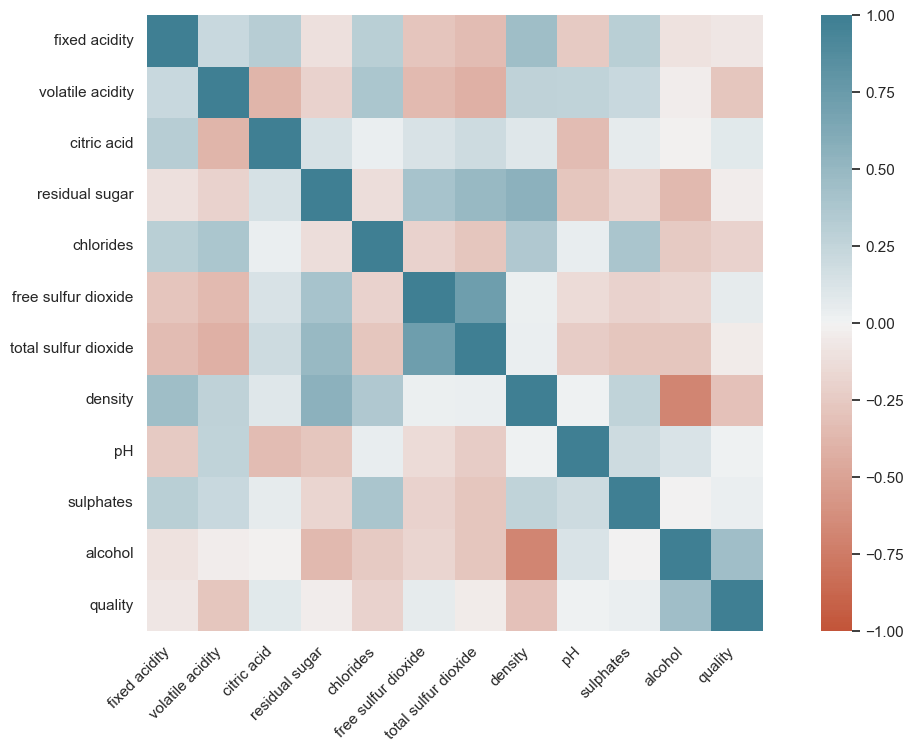

In [150]:
#clean data set so there are no string values
no_strings = allwine_base_df.drop(columns=["wine_type","quality_label"])

corr = no_strings.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

sns.set(rc = {'figure.figsize':(15,8)})


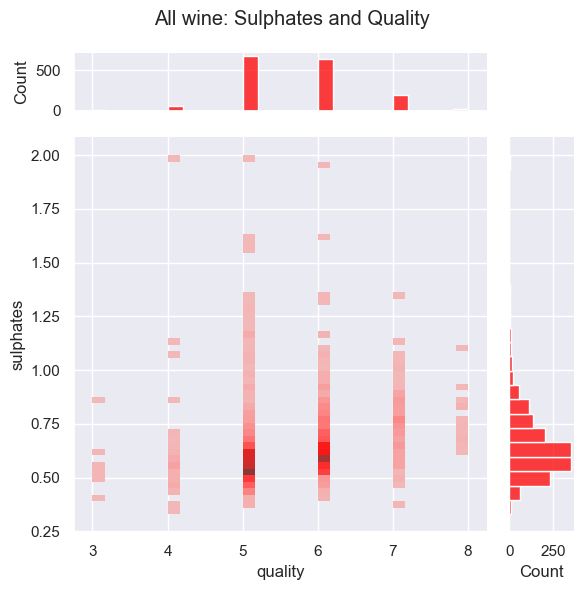

In [151]:
#Make a joint plot for the sulphates and quality of red wine 

allwine_base_df.head()
redwine_jointplt = sns.jointplot(data = red_base_df, x = "quality", y="sulphates", kind = "hist", color = "red",
              marginal_ticks= True,
               marginal_kws=dict(bins=25, fill=True))

redwine_jointplt.fig.suptitle("All wine: Sulphates and Quality")
redwine_jointplt.fig.tight_layout()



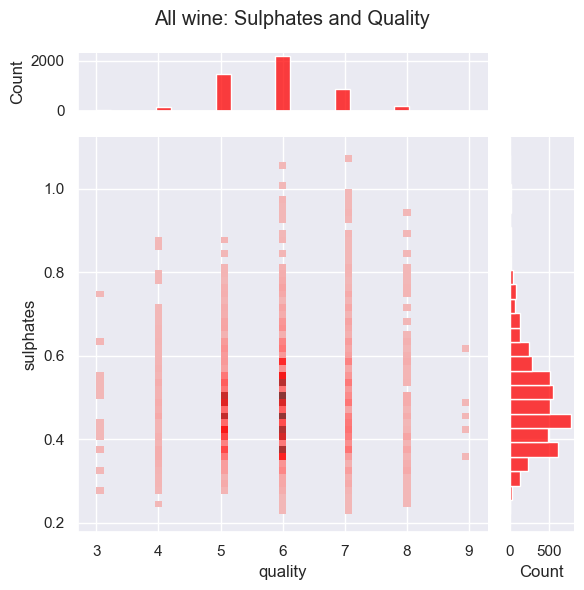

In [152]:
#Make a joint plot for the sulphates and quality of white wine 

whitewine_jointplt = sns.jointplot(data = white_base_df, x = "quality", y="sulphates", kind = "hist", color = "red",
              marginal_ticks= True,
               marginal_kws=dict(bins=25, fill=True))

whitewine_jointplt.fig.suptitle("All wine: Sulphates and Quality")
whitewine_jointplt.fig.tight_layout()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   wine_type             1599 non-null   object  
 1   fixed acidity         1599 non-null   float64 
 2   volatile acidity      1599 non-null   float64 
 3   citric acid           1599 non-null   float64 
 4   residual sugar        1599 non-null   float64 
 5   chlorides             1599 non-null   float64 
 6   free sulfur dioxide   1599 non-null   float64 
 7   total sulfur dioxide  1599 non-null   float64 
 8   density               1599 non-null   float64 
 9   pH                    1599 non-null   float64 
 10  sulphates             1599 non-null   float64 
 11  alcohol               1599 non-null   float64 
 12  quality               1599 non-null   int64   
 13  quality_label         1599 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

Text(0.5, 1.0, 'Red Wines - Sulphates, Alcohol and Quality')

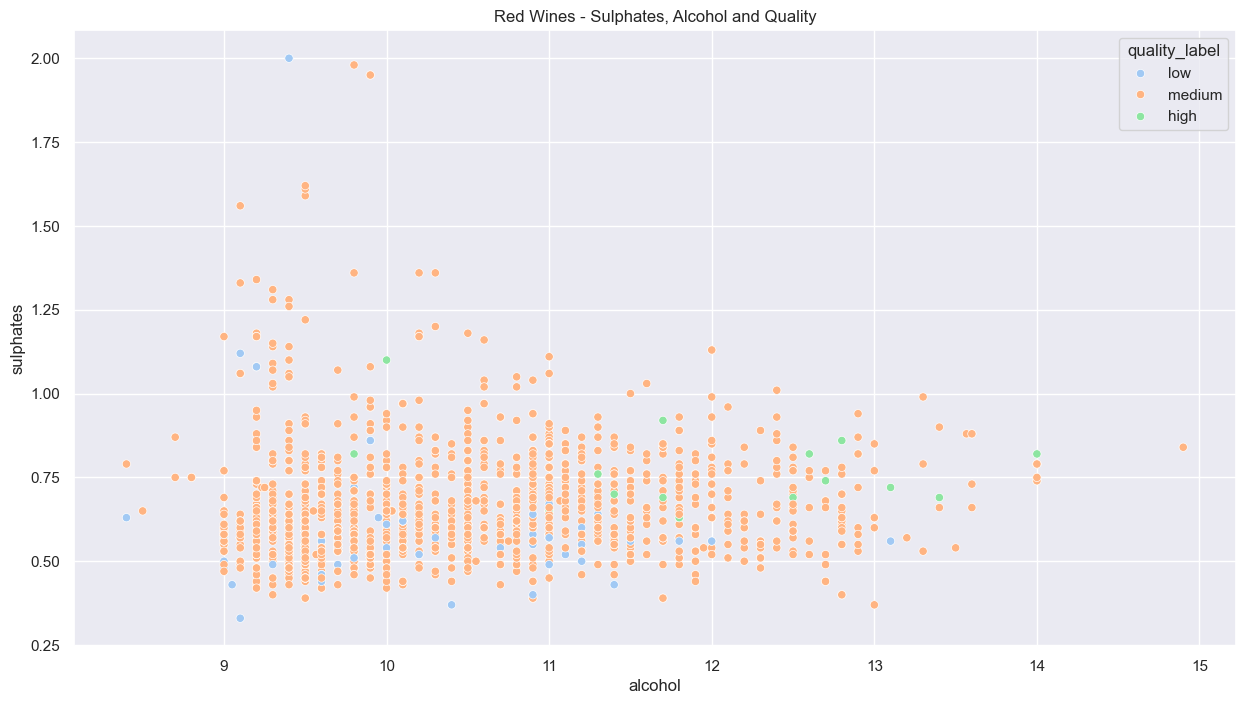

In [153]:
#Create a scatter plot for red wines, comparing x: alcohol, y: sulphates and quality(low,med, high)


red_withqual = allwine_base_df[allwine_base_df["wine_type"]=="red"].reset_index(drop = True)
white_withqual = allwine_base_df[allwine_base_df["wine_type"] == "white"].reset_index(drop = True)

#red_base_df.info()
red_withqual.info()
sns.scatterplot(data=red_withqual, x="alcohol", y="sulphates", hue = "quality_label", palette= "pastel")
plt.title("Red Wines - Sulphates, Alcohol and Quality")

In [154]:


# All wines F and P value test
F, p = stats.f_oneway(allwine_base_df[allwine_base_df['quality_label'] == 'low']['alcohol'],
allwine_base_df[allwine_base_df['quality_label'] == 'medium']['alcohol'],
allwine_base_df[allwine_base_df['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across ALL wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)


# Red wine F and P value 
F, p = stats.f_oneway(red_withqual[red_withqual['quality_label'] == 'low']['alcohol'],
red_withqual[red_withqual['quality_label'] == 'medium']['alcohol'],
red_withqual[red_withqual['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across RED wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

# White wine F and P value 
F, p = stats.f_oneway(white_withqual[white_withqual['quality_label'] == 'low']['alcohol'],
white_withqual[white_withqual['quality_label'] == 'medium']['alcohol'],
white_withqual[white_withqual['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across RED wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)


ANOVA test for mean alcohol levels across ALL wine samples with different quality ratings
F Statistic: 113.65380739768416 	p-value: 3.054840719743195e-49
ANOVA test for mean alcohol levels across RED wine samples with different quality ratings
F Statistic: 24.091397741571882 	p-value: 4.921125532886117e-11
ANOVA test for mean alcohol levels across RED wine samples with different quality ratings
F Statistic: 88.33833775249765 	p-value: 2.0477787709002867e-38
